In [231]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import re
from sklearn.metrics import roc_curve, auc


In [2]:
df=pd.read_csv('dataset/table_2_f99.csv') # 載入資料

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26557961 entries, 0 to 26557960
Data columns (total 31 columns):
user                    int64
time_stamp              int64
adgroup_id              int64
pid                     object
clk                     int64
cate_id                 int64
campaign_id             int64
customer                int64
price                   float64
cms_segid               int64
cms_group_id            int64
final_gender_code       int64
age_level               int64
pvalue_level            int64
shopping_level          int64
occupation              int64
new_user_class_level    int64
user_cate               object
pv_1                    int64
cart_1                  int64
fav_1                   int64
buy_1                   int64
pv_2                    int64
cart_2                  int64
fav_2                   int64
buy_2                   int64
pv_3                    int64
cart_3                  int64
fav_3                   int64
buy_3      

In [11]:
df.columns

Index(['user', 'adgroup_id', 'pid', 'clk', 'cate_id', 'campaign_id',
       'customer', 'price', 'cms_segid', 'cms_group_id', 'final_gender_code',
       'age_level', 'pvalue_level', 'shopping_level', 'occupation',
       'new_user_class_level', 'user_cate', 'pv_1', 'cart_1', 'fav_1', 'buy_1',
       'pv_2', 'cart_2', 'fav_2', 'buy_2', 'pv_3', 'cart_3', 'fav_3', 'buy_3',
       'brand_New'],
      dtype='object')

## 重新選取feature

In [10]:
df = df.drop('time_stamp', axis = 1)

In [25]:
df_10k = df[df.loc[:,'user']<109]
df_10k.shape

(3192, 30)

In [19]:
df_10k.to_csv('df_10k.csv',index = False)

In [26]:
df_10k=pd.read_csv('dataset/table3_10k.csv')

In [27]:
df_10k.shape

(2690, 33)

In [28]:
df_10k.columns

Index(['user', 'adgroup_id', 'pid', 'clk', 'cate_id', 'campaign_id',
       'customer', 'price', 'cms_segid', 'cms_group_id', 'final_gender_code',
       'age_level', 'pvalue_level', 'shopping_level', 'occupation',
       'new_user_class_level', 'user_cate', 'pv_1', 'cart_1', 'fav_1', 'buy_1',
       'pv_2', 'cart_2', 'fav_2', 'buy_2', 'pv_3', 'cart_3', 'fav_3', 'buy_3',
       'brand_New', 'user_ad_clk', 'cnt_clk', 'cnt_nonclk'],
      dtype='object')

In [29]:
df_10k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2690 entries, 0 to 2689
Data columns (total 33 columns):
user                    2690 non-null int64
adgroup_id              2690 non-null int64
pid                     2690 non-null object
clk                     2690 non-null int64
cate_id                 2690 non-null int64
campaign_id             2690 non-null int64
customer                2690 non-null int64
price                   2690 non-null float64
cms_segid               2690 non-null int64
cms_group_id            2690 non-null int64
final_gender_code       2690 non-null int64
age_level               2690 non-null int64
pvalue_level            2690 non-null int64
shopping_level          2690 non-null int64
occupation              2690 non-null int64
new_user_class_level    2690 non-null int64
user_cate               2690 non-null object
pv_1                    2690 non-null int64
cart_1                  2690 non-null int64
fav_1                   2690 non-null int64
buy_1    

## 整理表格

In [36]:
to_Obj =['user', 'adgroup_id', 'pid', 'clk', 'cate_id',
       'campaign_id', 'customer', 'cms_segid', 'cms_group_id',
       'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level',
       'occupation', 'new_user_class_level', 'user_cate','brand_New']
for col in to_Obj:
    df_10k[col]=df_10k[col].astype(str)


In [37]:
to_int8 =['pv_1', 'cart_1',
       'fav_1', 'buy_1', 'pv_2', 'cart_2', 'fav_2', 'buy_2', 'pv_3', 'cart_3',
       'fav_3', 'buy_3','cnt_clk','cnt_nonclk']
for col in to_int8:
    df_10k[col]=df_10k[col].astype(np.int8)


In [39]:
df_10k = df_10k.drop('user_ad_clk', axis = 1)

In [47]:
df_10k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2690 entries, 0 to 2689
Data columns (total 32 columns):
user                    2690 non-null object
adgroup_id              2690 non-null object
pid                     2690 non-null object
clk                     2690 non-null object
cate_id                 2690 non-null object
campaign_id             2690 non-null object
customer                2690 non-null object
price                   2690 non-null float64
cms_segid               2690 non-null object
cms_group_id            2690 non-null object
final_gender_code       2690 non-null object
age_level               2690 non-null object
pvalue_level            2690 non-null object
shopping_level          2690 non-null object
occupation              2690 non-null object
new_user_class_level    2690 non-null object
user_cate               2690 non-null object
pv_1                    2690 non-null int8
cart_1                  2690 non-null int8
fav_1                   2690 non-null int

In [42]:
def trainTestValSplit(df):
    # 將資料切分為訓練(70%),測試(15%)和驗證(15%)三份。
    train=df.sample(frac=0.7)
    test=df.drop( train.index )
    val=test.sample(frac=0.5)
    test=test.drop( val.index)
    return train,test,val

def dfXYSplit(df,targetName):
    # 將特徵和目標變數切成兩份資料。
    
    dfX=df.drop(columns=targetName)
    dfY=df[targetName]
    
    return dfX,dfY

In [49]:
df_10k = df_10k.drop('cnt_clk',axis = 1)

In [72]:
df_10k = df_10k.drop('cnt_nonclk',axis = 1)

In [200]:
df_10k = df_10k.drop('user_cate',axis = 1)

ValueError: labels ['user_cate'] not contained in axis

In [201]:
df_10k.columns

Index(['user', 'adgroup_id', 'pid', 'clk', 'cate_id', 'campaign_id',
       'customer', 'price', 'cms_segid', 'cms_group_id', 'final_gender_code',
       'age_level', 'pvalue_level', 'shopping_level', 'occupation',
       'new_user_class_level', 'pv_1', 'cart_1', 'fav_1', 'buy_1', 'pv_2',
       'cart_2', 'fav_2', 'buy_2', 'pv_3', 'cart_3', 'fav_3', 'buy_3',
       'brand_New'],
      dtype='object')

In [202]:
# train,test,val=trainTestValSplit(df)    #將整份data分成 train set, test set, validation set 三份

# trainX,trainY=dfXYSplit(train,"clk")    #將training set 分成trainX & trainY
# testX,testY=dfXYSplit(test,"clk")       #將test set 分成trainX & trainY
# valX,valY=dfXYSplit(val,"clk")          #將validation set 分成trainX & trainY

In [203]:
train,test,val=trainTestValSplit(df_10k)    #將整份data分成 train set, test set, validation set 三份

trainX,trainY=dfXYSplit(train,"clk")    #將training set 分成trainX & trainY
testX,testY=dfXYSplit(test,"clk")       #將test set 分成trainX & trainY
valX,valY=dfXYSplit(val,"clk")          #將validation set 分成trainX & trainY

In [204]:
trainX.columns

Index(['user', 'adgroup_id', 'pid', 'cate_id', 'campaign_id', 'customer',
       'price', 'cms_segid', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level',
       'pv_1', 'cart_1', 'fav_1', 'buy_1', 'pv_2', 'cart_2', 'fav_2', 'buy_2',
       'pv_3', 'cart_3', 'fav_3', 'buy_3', 'brand_New'],
      dtype='object')

### Decision Tree

In [205]:
from sklearn import tree
from sklearn.metrics import classification_report

In [206]:
%%time
clf=tree.DecisionTreeClassifier(class_weight="balanced",criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
model=clf.fit(trainX,trainY)

CPU times: user 36 ms, sys: 12 ms, total: 48 ms
Wall time: 47 ms


In [207]:
%%time
testPredY=model.predict(testX)
valPredY=model.predict(valX)

print( classification_report(testY,testPredY) )
print( classification_report(valY,valPredY) )

             precision    recall  f1-score   support

          0       0.98      0.46      0.63       380
          1       0.09      0.87      0.16        23

avg / total       0.93      0.49      0.60       403

             precision    recall  f1-score   support

          0       0.97      0.51      0.67       380
          1       0.08      0.71      0.15        24

avg / total       0.91      0.52      0.64       404

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 22.9 ms


In [208]:
tree.DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Random Forest

In [209]:
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble.forest import RandomForestClassifier

In [210]:
trainXNew = np.concatenate([trainX,valX],axis=0)
trainYNew = np.concatenate([trainY,valY],axis=0)

In [211]:
assert valX.shape[0]+trainX.shape[0] == trainXNew.shape[0]
assert valY.shape[0]+trainY.shape[0] == trainYNew.shape[0]

max_depth=5

In [212]:
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
model=clf.fit(trainX,trainY)

In [213]:
model.oob_score_

0.7259691980881572

In [214]:
%%time
testPredY=model.predict(testX)
valPredY=model.predict(valX)

print( classification_report(testY,testPredY) )
print( classification_report(valY,valPredY) )

             precision    recall  f1-score   support

          0       0.96      0.76      0.85       380
          1       0.12      0.52      0.19        23

avg / total       0.92      0.75      0.81       403

             precision    recall  f1-score   support

          0       0.94      0.73      0.82       380
          1       0.06      0.29      0.11        24

avg / total       0.89      0.71      0.78       404

CPU times: user 60 ms, sys: 0 ns, total: 60 ms
Wall time: 56.6 ms


In [252]:
test.loc[:,'clk'].astype(int)

5       0
13      1
14      0
19      0
24      0
26      0
31      0
32      1
35      0
36      0
38      0
40      0
41      0
42      0
43      0
60      0
62      1
68      0
70      1
71      0
78      0
99      0
109     0
112     0
120     0
129     0
136     0
137     0
141     0
147     0
       ..
2469    0
2519    0
2522    0
2526    0
2532    0
2536    0
2543    0
2545    0
2548    0
2551    0
2553    0
2554    0
2561    0
2570    0
2582    1
2592    0
2593    0
2599    0
2601    0
2604    0
2608    0
2609    0
2613    0
2629    1
2635    0
2636    0
2647    1
2658    0
2664    0
2686    0
Name: clk, Length: 403, dtype: int64

In [72]:
df_10k = df_10k.drop('cnt_nonclk',axis = 1)

In [215]:
model.feature_importances_

array([0.08337546, 0.07220797, 0.0057132 , 0.04544019, 0.0466074 ,
       0.0418004 , 0.05347669, 0.03297646, 0.04644359, 0.01784894,
       0.03277461, 0.03854585, 0.02118557, 0.00943933, 0.10203337,
       0.03074343, 0.00591055, 0.00084269, 0.        , 0.06169449,
       0.00998613, 0.02156419, 0.        , 0.14985999, 0.02593448,
       0.01175773, 0.0040668 , 0.0277705 ])

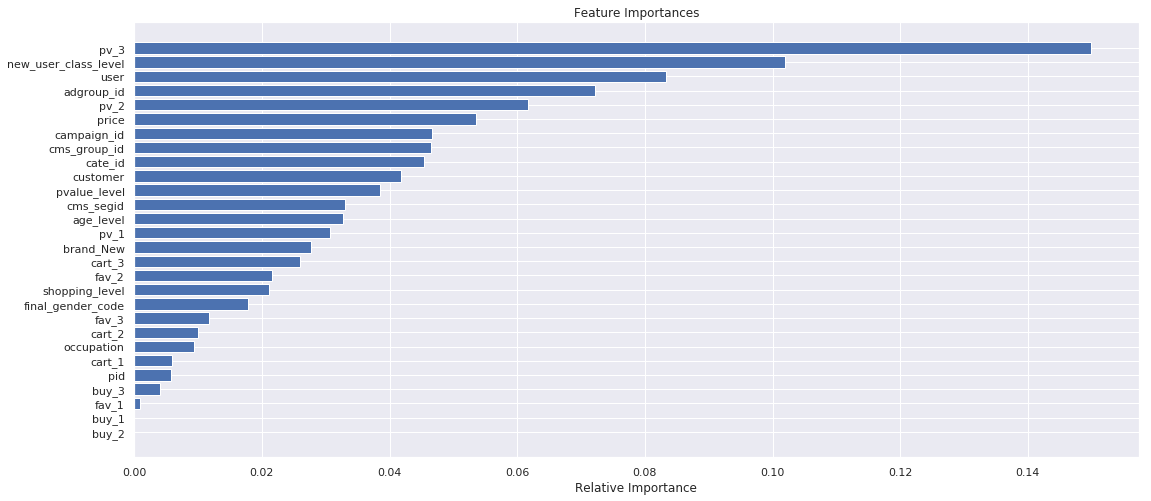

In [216]:
features = trainX.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(18,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [257]:
trueY = [1,0,0,1,0,0]
predY = [0.8,0.2,0.1,0.7,0.2,0.1]

In [262]:
fpr, tpr, thresholds = roc_curve(predY, trueY)
roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()

ValueError: continuous format is not supported

n_estimators

In [217]:
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
model=clf.fit(trainX,trainY)

In [218]:
model

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [184]:
model.oob_score_

0.7785448751991503

In [219]:
%%time
testPredY=model.predict(testX)
valPredY=model.predict(valX)

print( classification_report(testY,testPredY) )
print( classification_report(valY,valPredY) )

             precision    recall  f1-score   support

          0       0.96      0.82      0.89       380
          1       0.13      0.43      0.20        23

avg / total       0.91      0.80      0.85       403

             precision    recall  f1-score   support

          0       0.94      0.79      0.86       380
          1       0.07      0.25      0.11        24

avg / total       0.89      0.76      0.82       404

CPU times: user 68 ms, sys: 4 ms, total: 72 ms
Wall time: 71.8 ms


In [220]:
testX.columns

Index(['user', 'adgroup_id', 'pid', 'cate_id', 'campaign_id', 'customer',
       'price', 'cms_segid', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level',
       'pv_1', 'cart_1', 'fav_1', 'buy_1', 'pv_2', 'cart_2', 'fav_2', 'buy_2',
       'pv_3', 'cart_3', 'fav_3', 'buy_3', 'brand_New'],
      dtype='object')

In [221]:
model.feature_importances_

array([0.09539332, 0.0696553 , 0.00676277, 0.06926729, 0.05212744,
       0.04691526, 0.06204635, 0.02034618, 0.05274958, 0.01251474,
       0.02592151, 0.03365663, 0.01824284, 0.00768995, 0.09201709,
       0.0302006 , 0.00673674, 0.00193553, 0.        , 0.05841432,
       0.01339861, 0.02163288, 0.        , 0.11718891, 0.02827928,
       0.012556  , 0.00354889, 0.040802  ])

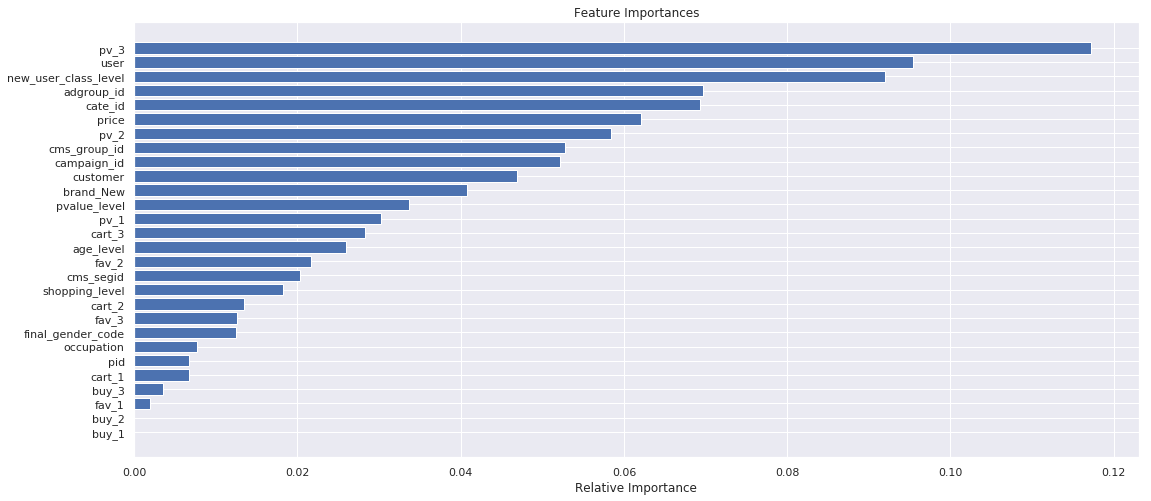

In [222]:
features = trainX.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(18,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

gridsearch

In [223]:
from sklearn.model_selection import GridSearchCV

In [224]:
clf = RandomForestClassifier(n_jobs=-1)

In [225]:
param_grid = { 
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    
}

In [226]:
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(trainX, trainY)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [227]:
model=clf.fit(trainX,trainY)

testPredY=model.predict(testX)
valPredY=model.predict(valX)

print( classification_report(testY,testPredY) )
print( classification_report(valY,valPredY) )

             precision    recall  f1-score   support

          0       0.94      0.98      0.96       380
          1       0.00      0.00      0.00        23

avg / total       0.89      0.92      0.90       403

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       380
          1       0.00      0.00      0.00        24

avg / total       0.88      0.93      0.91       404



In [228]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 50}

In [229]:
rfc1=RandomForestClassifier(max_features='auto', n_estimators= 50, max_depth=4, criterion='gini')

In [230]:
model=clf.fit(trainX,trainY)

testPredY=model.predict(testX)
valPredY=model.predict(valX)

print( classification_report(testY,testPredY) )
print( classification_report(valY,valPredY) )

             precision    recall  f1-score   support

          0       0.94      0.99      0.97       380
          1       0.00      0.00      0.00        23

avg / total       0.89      0.93      0.91       403

             precision    recall  f1-score   support

          0       0.94      0.99      0.97       380
          1       0.00      0.00      0.00        24

avg / total       0.88      0.94      0.91       404

